## load data

In [20]:
import pandas as pd

# Load the PCA scores and loadings
pca_scores = pd.read_csv('pca_scores.csv', index_col=0)
pca_loadings = pd.read_csv('pca_loadings.csv', index_col=0)

## Scatter Plot

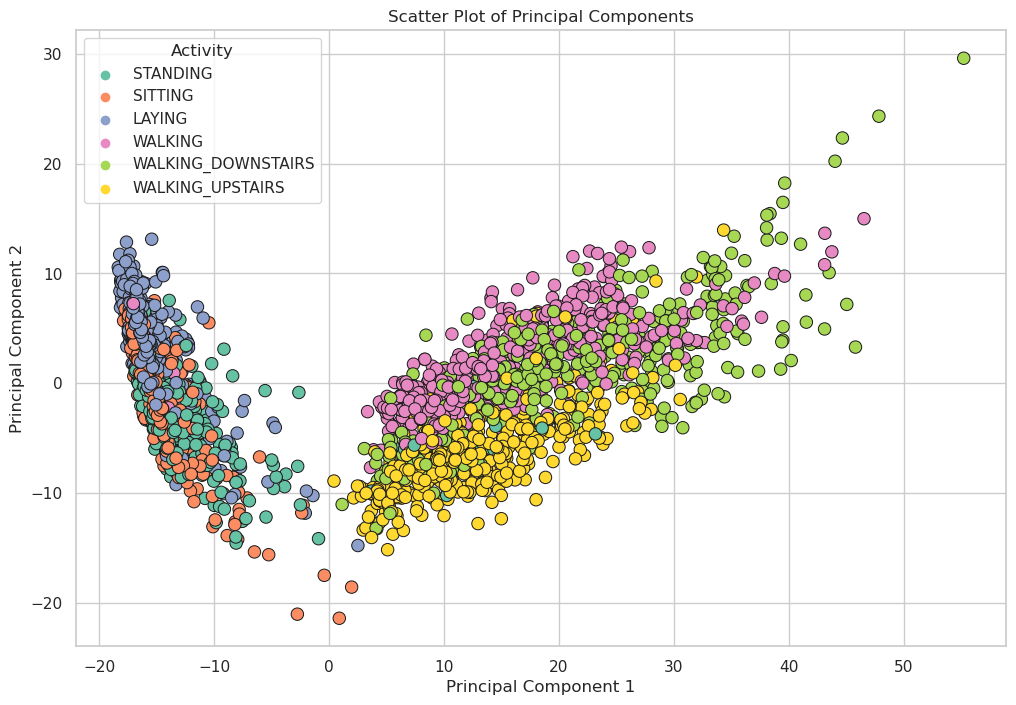

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the target variable is in the last column of the original dataset
# Load the original dataset to get the target labels
data = pd.read_csv('data/test.csv')
y = data.iloc[:, -1]

# Add the target labels to the PCA scores DataFrame
pca_scores['Activity'] = y

# Run the PCA biplot function
feature_labels = pca_loadings.index.to_list()

### Scatter Plot of Principal Components ----
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=pca_scores['PC1'],
    y=pca_scores['PC2'],
    hue=pca_scores['Activity'],
    palette='Set2',
    s=80,
    edgecolor='k'
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()


## Loading Plot

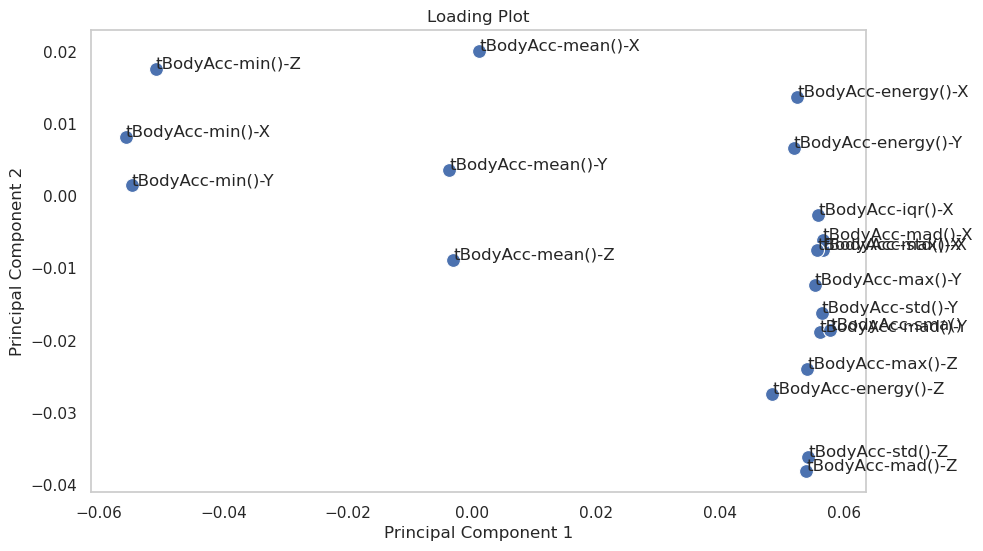

In [25]:
# limit to only top 20 features
pca_loadings = pca_loadings.iloc[:20, :]


# Loading plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_loadings, s=100)
for i in pca_loadings.index:
    plt.text(pca_loadings.PC1[i], pca_loadings.PC2[i], i)
plt.title('Loading Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

## Biplot

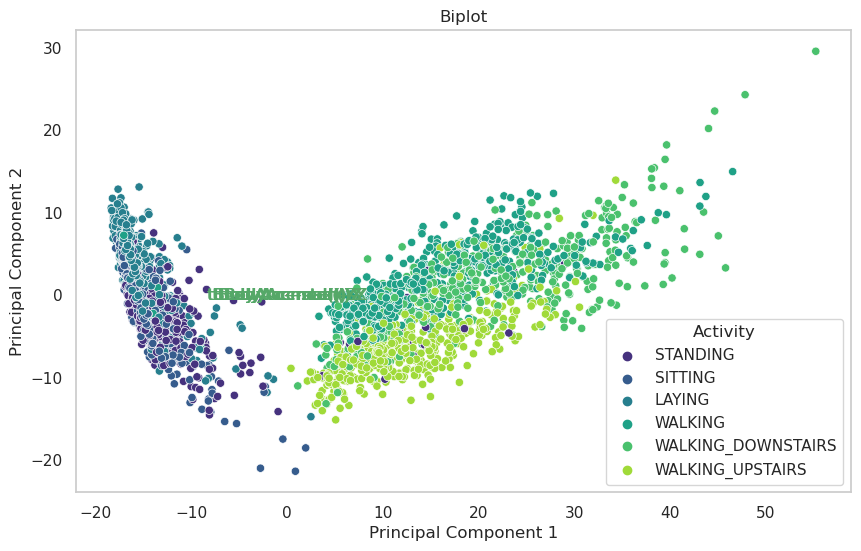

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PCA scores and loadings
pca_scores = pd.read_csv('pca_scores.csv', index_col=0)
pca_loadings = pd.read_csv('pca_loadings.csv', index_col=0)

# Assuming the target variable is in the last column of the original dataset
# Load the original dataset to get the target labels
# data = pd.read_csv('path_to_your_dataset.csv')
y = data.iloc[:, -1]

# Add the target labels to the PCA scores DataFrame
pca_scores['Activity'] = y

# Create the biplot
plt.figure(figsize=(10, 6))

# Scatter plot of the principal components
sns.scatterplot(x='PC1', y='PC2', hue='Activity', data=pca_scores, palette='viridis')

# show only top10 features
pca_loadings = pca_loadings.iloc[:10, :]

# Plot the loadings
for i in range(pca_loadings.shape[0]):
    plt.arrow(0, 0, pca_loadings.iloc[i, 0], pca_loadings.iloc[i, 1], color='r', alpha=0.5)
    plt.text(pca_loadings.iloc[i, 0] * 1.15, pca_loadings.iloc[i, 1] * 1.15, pca_loadings.index[i], color='g', ha='center', va='center')

plt.title('Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

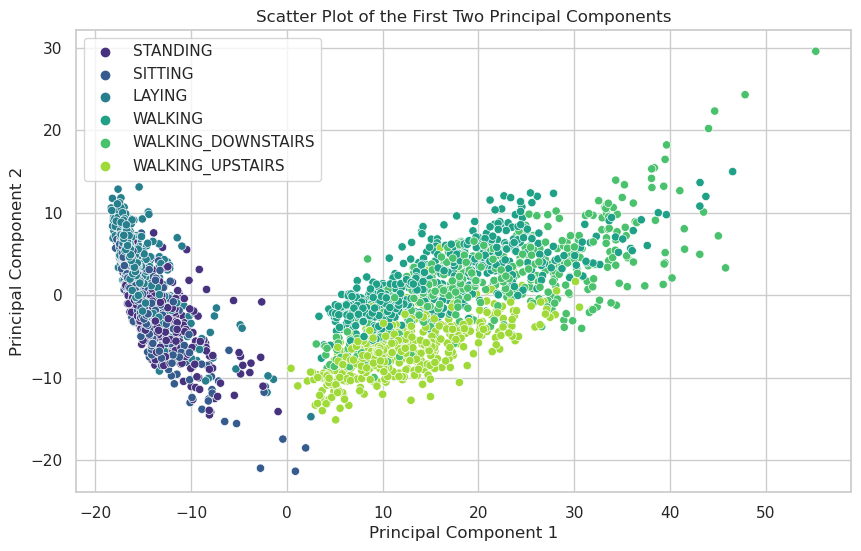

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('data/test.csv')

# Assuming the target variable is in the last column
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Activity'] = y

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Activity', data=pca_df, palette='viridis')
plt.title('Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()

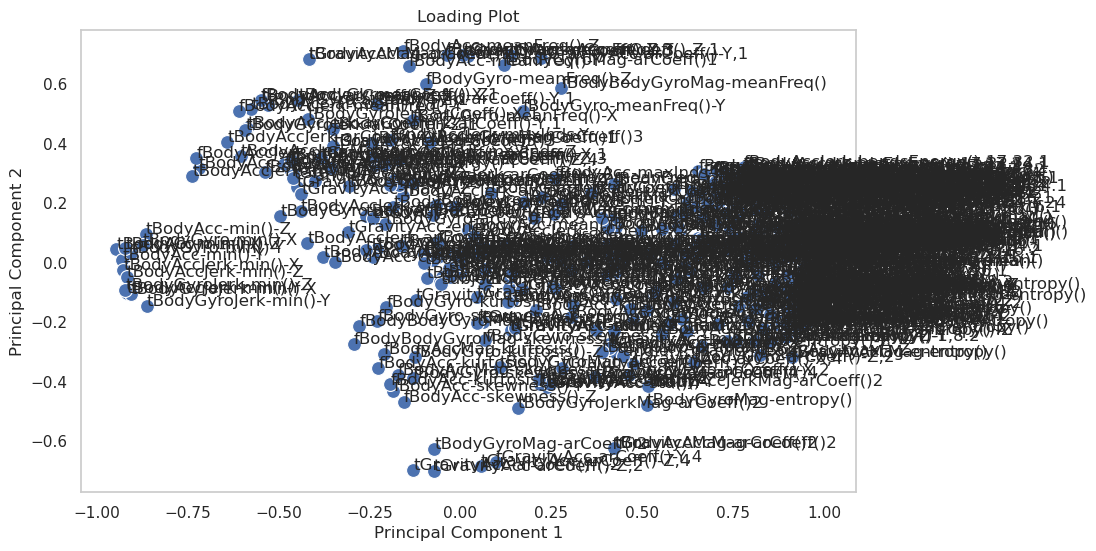

In [38]:
# Get the loadings (coefficients of the original variables)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=data.columns[:-1])

# Loading plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=loadings_df, s=100)
for i in loadings_df.index:
    plt.text(loadings_df.PC1[i], loadings_df.PC2[i], i)
plt.title('Loading Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [42]:
scores_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC553,PC554,PC555,PC556,PC557,PC558,PC559,PC560,PC561,PC562
1,-10.883667,-2.516531,-0.173063,-1.062580,3.312203,-4.144161,-2.324019,3.028265,-1.532846,4.498521,...,4.255516e-16,-3.015772e-16,-2.506012e-16,4.517068e-16,4.345845e-16,5.118362e-16,-3.019818e-17,5.375201e-16,-8.354520e-17,1.287165e-15
2,-14.129777,-1.361048,0.878290,2.721075,2.748984,-1.041936,-2.336348,-2.102764,-1.983714,1.122552,...,-5.351808e-16,1.114567e-16,-4.607410e-16,3.078016e-16,-1.867863e-16,2.014676e-16,-1.064864e-16,-1.291808e-16,-3.559779e-16,1.519618e-15
3,-15.409094,1.992323,-0.733236,2.273288,2.718714,-0.818987,0.075327,2.515412,2.037754,-0.474912,...,-1.685818e-16,-3.142921e-16,2.047218e-16,8.962277e-17,2.005933e-16,2.156408e-16,3.239931e-16,-1.685834e-16,-1.464467e-16,1.734723e-16
4,-15.671059,1.309025,-0.089828,2.300529,3.713006,-1.112807,1.100044,1.106619,1.141234,-1.237238,...,-2.282178e-16,5.718728e-17,2.375479e-17,1.090732e-16,7.871998e-17,-1.440105e-16,-1.588374e-16,1.064758e-17,-6.475554e-16,-2.775558e-17
5,-14.879493,-2.340812,0.917669,3.012162,2.038150,-1.450944,-0.004361,-2.001638,2.442249,0.068049,...,-1.725392e-16,3.300079e-16,2.241890e-16,-2.782978e-17,4.018741e-16,1.213820e-16,-7.425457e-18,-1.300692e-16,-7.223600e-17,1.370432e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,10.981118,-6.983836,-3.481068,2.162071,-3.961055,1.700080,0.706340,-2.240312,0.685771,-0.475862,...,2.502492e-16,-3.729433e-16,-6.452959e-18,3.142086e-16,-3.337834e-16,-1.465504e-16,5.048569e-16,-3.510065e-16,3.647239e-16,-1.838807e-16
2944,13.048908,-5.102519,-2.823082,1.462854,-1.645429,0.721874,1.094563,-0.814438,-0.586199,-0.979835,...,1.980162e-16,2.339288e-16,-2.178478e-16,-5.582530e-16,-6.023774e-16,-1.473314e-16,4.749405e-16,-2.933298e-16,3.614652e-16,1.729519e-15
2945,12.989227,-3.770385,-4.567754,-0.765025,1.048625,-1.346992,-0.220677,-0.706059,-1.187753,-2.073769,...,-3.554806e-16,-1.154434e-15,-3.566458e-16,-8.876399e-16,-6.429135e-16,1.449209e-16,6.964958e-17,-1.105305e-16,4.672751e-16,9.653736e-16
2946,9.005292,-5.213059,-4.917726,0.676907,-1.355115,-1.742935,0.488664,-0.392495,-0.371986,-1.578999,...,4.320177e-16,-3.782262e-17,2.694172e-16,7.757899e-17,-3.369286e-16,-4.672873e-16,1.050564e-16,-1.722456e-16,4.959081e-16,-2.095546e-15


In [41]:
print(scores_df.columns)


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC553', 'PC554', 'PC555', 'PC556', 'PC557', 'PC558', 'PC559', 'PC560',
       'PC561', 'PC562'],
      dtype='object', length=562)


In [43]:
# Read PCA scores
scores_df = pd.read_csv("pca_scores.csv")

# Read PCA loadings
loadings_df = pd.read_csv("pca_loadings.csv", index_col=0)

In [49]:
import pandas as pd

# Read the PCA scores
scores_df = pd.read_csv("pca_scores.csv", index_col=0)

# Read the PCA loadings
loadings_df = pd.read_csv("pca_loadings.csv", index_col=0)


In [50]:
# Assuming you have a CSV file with activity labels
activities_df = pd.read_csv("activity_labels.csv")

# Merge the activity labels with the PCA scores
merged_df = pd.concat([scores_df, activities_df['activity']], axis=1)


FileNotFoundError: [Errno 2] No such file or directory: 'activity_labels.csv'

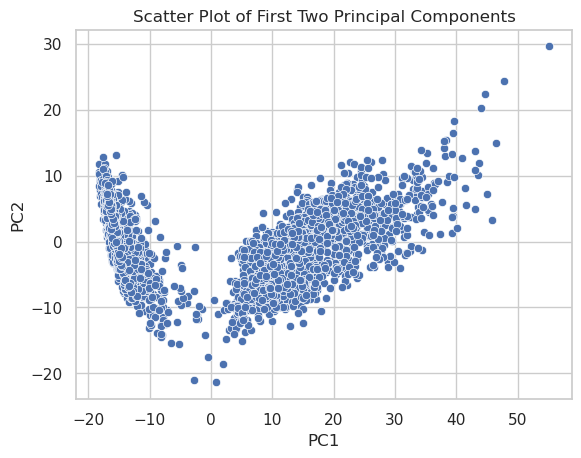

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=scores_df, x="PC1", y="PC2")
plt.title("Scatter Plot of First Two Principal Components")
plt.show()


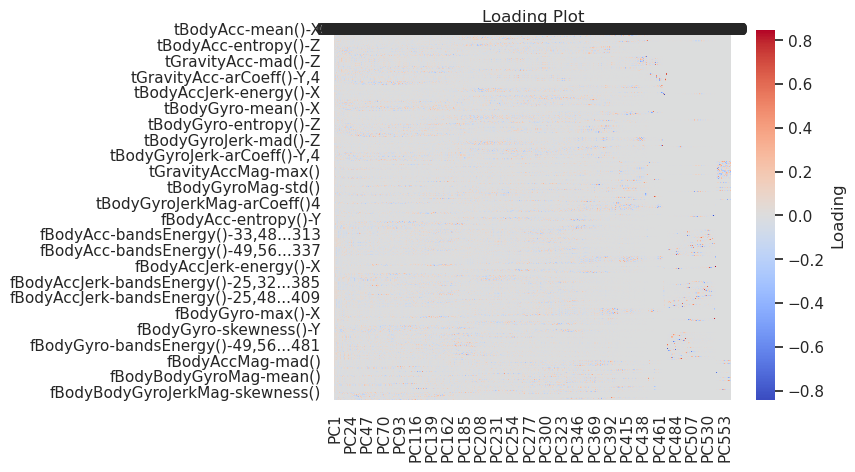

In [45]:
sns.heatmap(loadings_df, cmap="coolwarm", center=0, annot=True, fmt=".2f", cbar_kws={"label": "Loading"})
plt.title("Loading Plot")
plt.show()
